# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [4]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

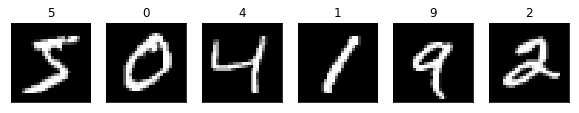

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

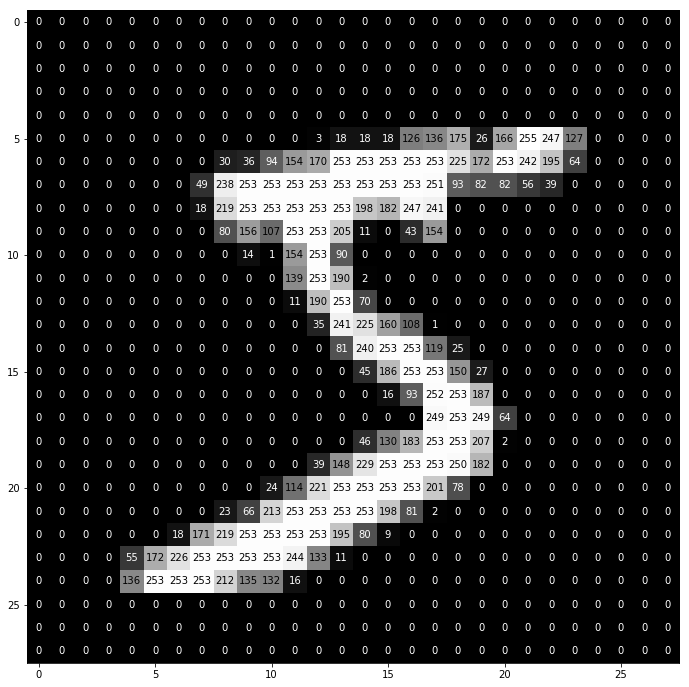

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [7]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [8]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 7. Compile the Model

In [10]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 12.2400%


### 9. Train the Model

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s - loss: 0.2741 - acc: 0.9155 - val_loss: 0.1289 - val_acc: 0.9608
Epoch 2/10
48000/48000 [==============================] - 7s - loss: 0.1126 - acc: 0.9657 - val_loss: 0.0951 - val_acc: 0.9723
Epoch 3/10
48000/48000 [==============================] - 7s - loss: 0.0816 - acc: 0.9749 - val_loss: 0.1099 - val_acc: 0.9683
Epoch 4/10
48000/48000 [==============================] - 8s - loss: 0.0628 - acc: 0.9814 - val_loss: 0.0860 - val_acc: 0.9764
Epoch 5/10
48000/48000 [==============================] - 8s - loss: 0.0520 - acc: 0.9845 - val_loss: 0.0922 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 8s - loss: 0.0440 - acc: 0.9866 - val_loss: 0.1001 - val_acc: 0.9765
Epoch 7/10
48000/48000 [==============================] - 8s - loss: 0.0397 - acc: 0.9881 - val_loss: 0.0932 - val_acc: 0.9781
Epoch 8/10
48000/48000 [==============================] - 8s 

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [13]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [14]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.8900%


## Mini Project on MLPs

**Remember:** Overfitting is detected by comparing the validation loss to the training loss. If the training loss is much lower than the validation loss, then the model might be overfitting.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label="Train")
    plt.plot(val_loss, label="Validation")
    plt.ylabel('Loss', size=15)
    plt.xlabel('Epoch', size=15)
    plt.title('Training vs Validation Loss', size=25)
    plt.legend()
    plt.show()
    

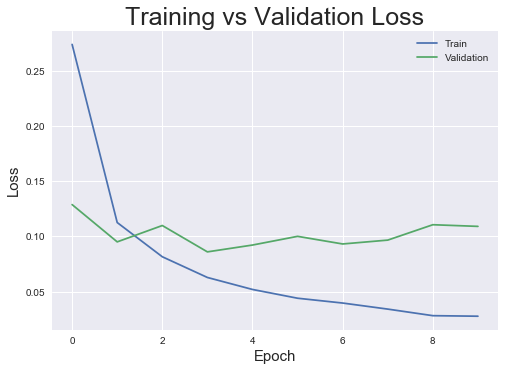

In [40]:
# compare losses on the actual model
plot_loss(hist.history['loss'], hist.history['val_loss'])

### Task 1: Increase/decrease the number of nodes in each of hidden layers. Do you notice evidence of overfitting (or underfitting)?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 700)               700700    
_________________________________________________________________
dropout_8 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7010      
Total params: 1,492,710.0
Trainable params: 1,492,710.0
Non-trainable params: 0.0
____________________________________________________________

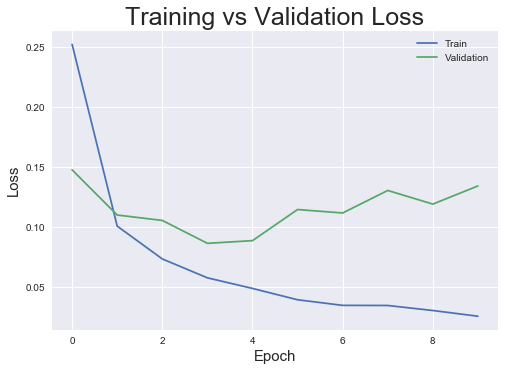

In [43]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(1000, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(700, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])

### Task 2: Increase/decrease the number of hidden layers. Do you notice evidence of overfitting (or underfitting)?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
__________

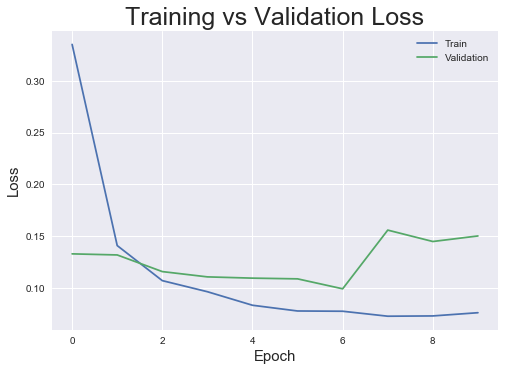

In [47]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])

### Task 3: Remove the dropout layers in the network. Do you notice evidence of overfitting?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________
Test accuracy before Training: 14.0600%
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s - loss: 0.2469 - acc: 0.9234 - val_loss: 0.1275 - val_acc: 0.9611
Epoch 2/10
48000/48000 [=====================

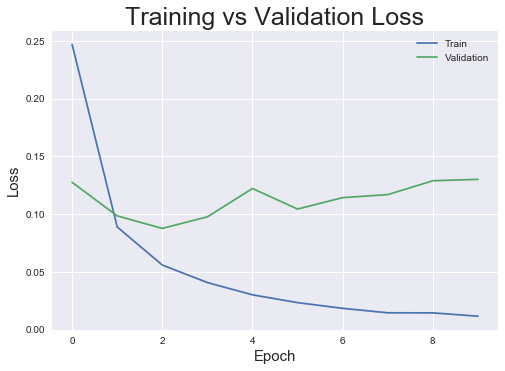

In [48]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dense(512, activation='relu'))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])

### Task 4: Remove the ReLU activation functions. Does the accuracy decrease?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

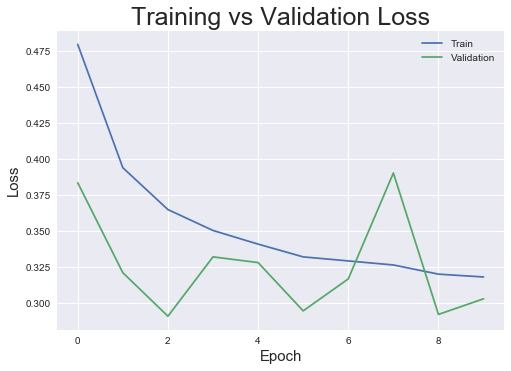

In [49]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(512))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])

### Task 6: Try a different optimizer, such as stochastic gradient descent.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

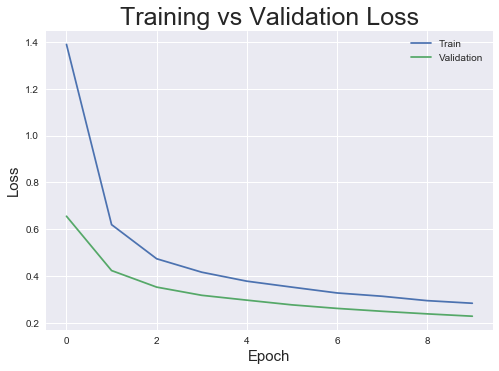

In [51]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(512, activation="relu"))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512, activation="relu"))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])

### Tasks 7: Increase the batch size.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

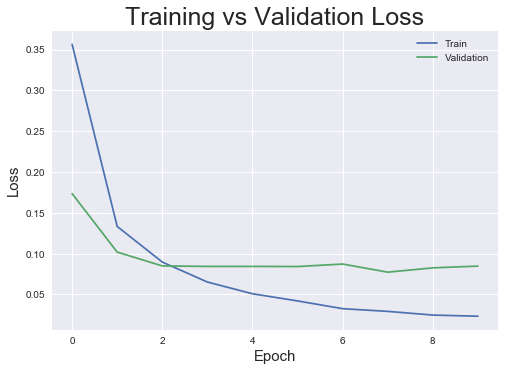

In [53]:
# define the model
model_tasks = Sequential()
model_tasks.add(Flatten(input_shape=X_train.shape[1:]))
model_tasks.add(Dense(512, activation="relu"))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(512, activation="relu"))
model_tasks.add(Dropout(0.2))
model_tasks.add(Dense(10, activation='softmax'))

# summarize the model
model_tasks.summary()

# compile the model
model_tasks.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy before Training: %.4f%%' % accuracy_tasks)


# train the model
checkpointer_tasks = ModelCheckpoint(filepath='mnist.model_tasks.best.hdf5', 
                               verbose=1, save_best_only=True)
hist_tasks = model_tasks.fit(X_train, y_train, batch_size=300, epochs=10,
          validation_split=0.2, callbacks=[checkpointer_tasks],
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_tasks.load_weights('mnist.model_tasks.best.hdf5')


# evaluate test accuracy
score_tasks = model_tasks.evaluate(X_test, y_test, verbose=0)
accuracy_tasks = 100*score_tasks[1]

# print test accuracy
print('Test accuracy after Training: %.4f%%' % accuracy_tasks)


# compare losses
plot_loss(hist_tasks.history['loss'], hist_tasks.history['val_loss'])